In [1]:
import numpy as np
from main_grape.Grape import Grape
from math_functions.helper_fns import *
%pylab inline




Populating the interactive namespace from numpy and matplotlib


In [2]:

#Defining time scales
total_time = 8.0
steps = 300
qubit_num = 3
qubit_state_num = 4

       

#Defining Forbidden sates

#states_forbidden_list = []

#Defining Concerned states (starting states)
psi0 = concerned(qubit_num,qubit_state_num)

#Defining states to include in the drawing of occupation
states_draw_list = range(qubit_state_num**qubit_num)
states_draw_names =[]
for ii in states_draw_list:
    states_draw_names.append(Basis(ii,qubit_num,qubit_state_num))

#Defining U (Target)

U= transmon_gate(qft(qubit_num),qubit_state_num)
#U = np.diag(np.arange(0,4))

#Defining U0 (Initial)
qq_identity = np.identity(qubit_state_num**qubit_num)
U0= qq_identity

#Defining control Hs
Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)-np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1))
Q_z   = np.diag(np.arange(0,qubit_state_num))
Q_I = np.identity(qubit_state_num)

Q_xx = multi_kron(Q_x,qubit_num)
Q_yy = multi_kron(Q_y,qubit_num)
Q_zz = multi_kron(Q_z,qubit_num)

H0 = 0.5* (Q_xx+Q_yy+Q_zz)

Hops = []
Hnames = []
ops_max_amp = []
Hops,Hnames,ops_max_amp = append_separate_krons(Q_x,'x',qubit_num,qubit_state_num,Hops,Hnames,ops_max_amp)
Hops,Hnames,ops_max_amp = append_separate_krons(Q_y,'y',qubit_num,qubit_state_num,Hops,Hnames,ops_max_amp)
Hops,Hnames,ops_max_amp = append_separate_krons(Q_z,'z',qubit_num,qubit_state_num,Hops,Hnames,ops_max_amp,amp=4.0*np.pi)
Hops.extend([Q_xx,Q_yy,Q_zz])
Hnames.extend(['all x','all y','all z'])
ops_max_amp.extend([4.0,4.0,4.0*np.pi])

#Defining convergence parameters
max_iterations = 600
decay = max_iterations/2
convergence = {'rate':0.01, 'update_step':100, 'max_iterations':max_iterations,\
               'conv_target':1e-8,'learning_rate_decay':decay}
reg_coeffs = {'alpha' : 0, 'z':0, 'dwdt':0,'d2wdt2':0, 'inter':0}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}

print states_draw_names
print Hnames
print np.shape(U)
print np.shape(Hops)





['000', '001', '002', '003', '010', '011', '012', '013', '020', '021', '022', '023', '030', '031', '032', '033', '100', '101', '102', '103', '110', '111', '112', '113', '120', '121', '122', '123', '130', '131', '132', '133', '200', '201', '202', '203', '210', '211', '212', '213', '220', '221', '222', '223', '230', '231', '232', '233', '300', '301', '302', '303', '310', '311', '312', '313', '320', '321', '322', '323', '330', '331', '332', '333']
['xii', 'ixi', 'iix', 'yii', 'iyi', 'iiy', 'zii', 'izi', 'iiz', 'all x', 'all y', 'all z']
(64, 64)
(12, 64, 64)


Error = 0.000979245; Runtime: 341.6s; grads =   1.380e-06


(array([[ 2.40169525,  3.13628817,  3.16532564, ..., -1.70213604,
         -2.04991555, -1.14016294],
        [ 0.08877242, -1.55119359, -0.84796888, ..., -1.42853677,
          1.29827559, -1.54552782],
        [-2.15097761,  1.18656063, -0.64253777, ...,  0.3464677 ,
         -0.89465338,  1.61490655],
        ..., 
        [-0.1099449 , -3.12932181, -1.1252892 , ..., -1.33524501,
         -3.67995811, -3.75151801],
        [ 1.08103645,  0.41390762,  0.15590896, ..., -1.2964536 ,
          1.42000771,  1.4316715 ],
        [-0.24761938,  2.5757041 , -1.15126061, ..., -1.69101918,
         -1.92119622, -3.39008927]], dtype=float32),
 array([[  3.01380813e-01 +1.85777888e-01j,
           3.01704496e-01 +1.83281139e-01j,
           1.18967524e-04 -3.84818553e-03j, ...,
          -1.51841974e-04 +2.78756209e-03j,
           3.17876297e-03 -3.64009221e-03j,
          -1.28368993e-04 +9.14689677e-04j],
        [  3.01463604e-01 +1.81363240e-01j,
           8.59416127e-02 +3.45367044e-01j,

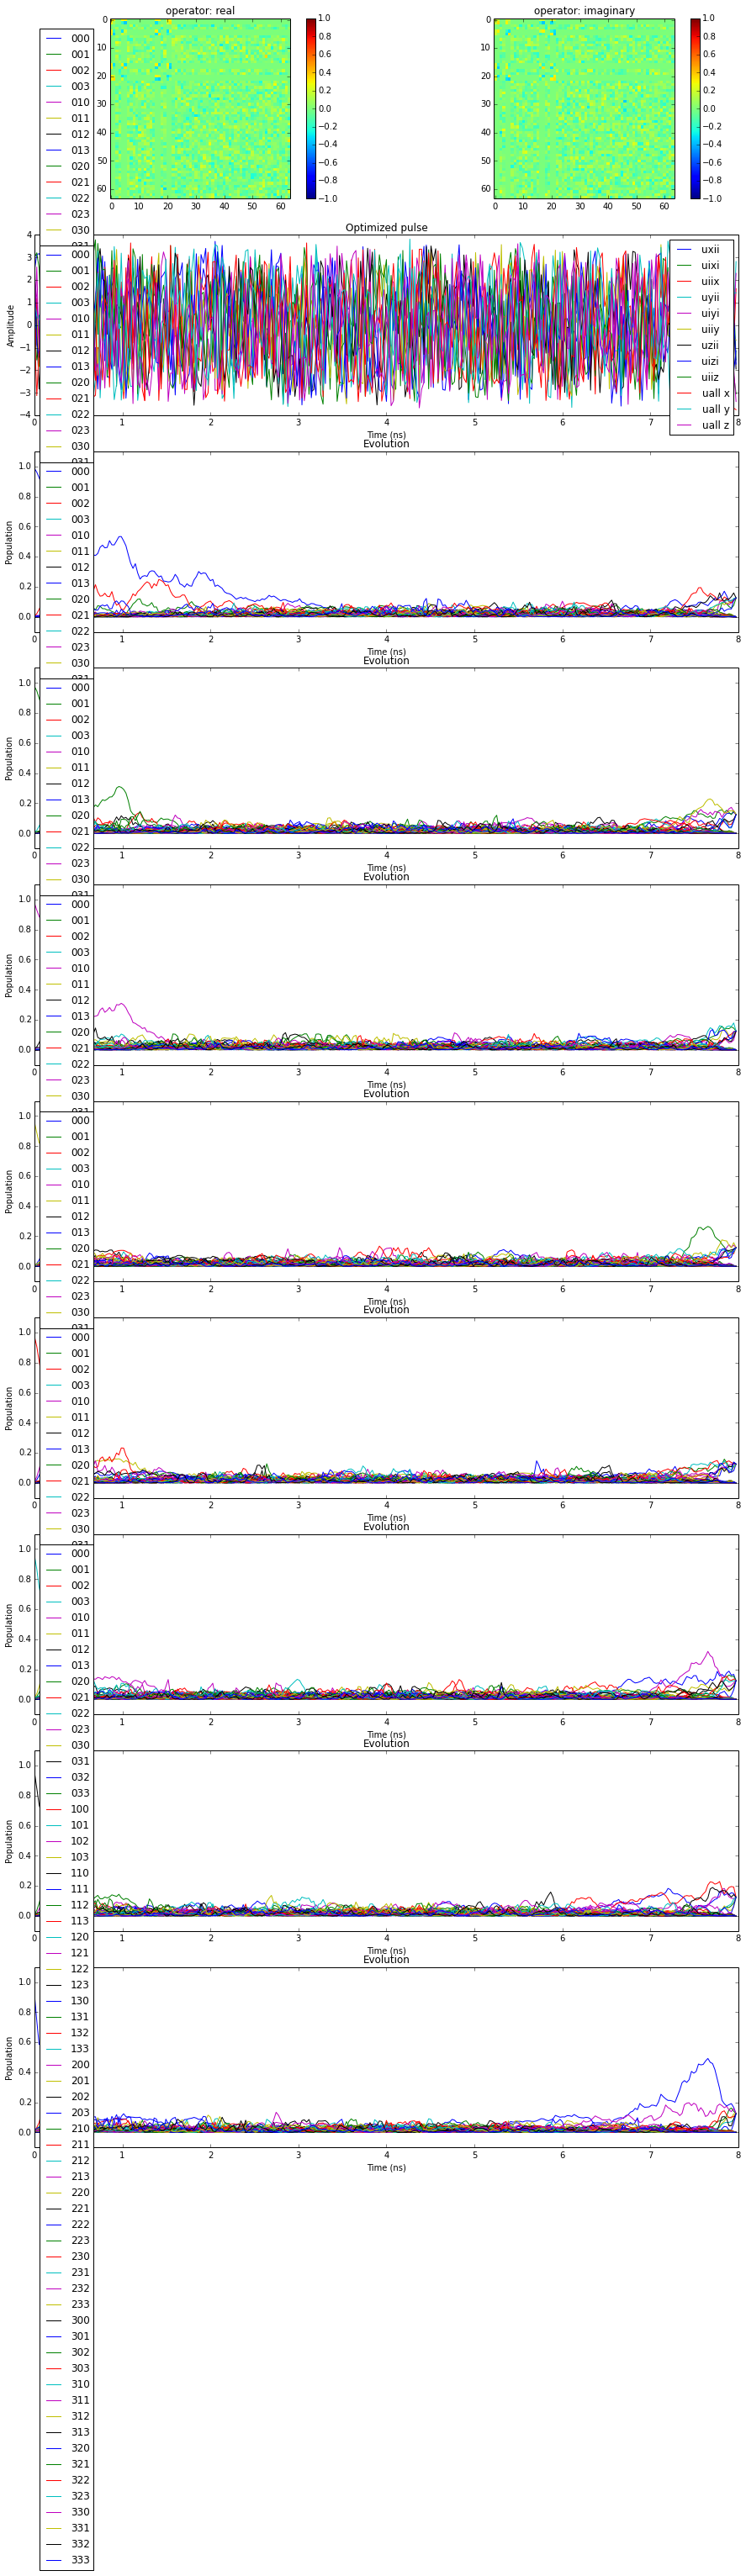

In [3]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True
Grape(H0,Hops,Hnames,U,U0,total_time,steps,psi0,convergence,reg_coeffs = reg_coeffs, draw = [states_draw_list,states_draw_names], show_plots = False, method = 'Adam')